<a href="https://colab.research.google.com/github/nanaso-mane/AI_Training/blob/main/dl_regression_insurance_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#importing essential packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data=pd.read_csv("/content/synthetic_insurance_data.csv")

In [39]:
data.head()

,CustomerID,Age,Gender,Region,InsuranceType,PolicyTenure,PremiumAmount,Claimed,ClaimAmount
0,1,56,Male,North,Property,5,14085.60,0,0.0
1,2,69,Male,South,Life,3,11022.60,0,0.0
2,3,46,Male,West,Property,29,4750.67,0,0.0
3,4,32,Female,North,Vehicle,28,14235.89,0,0.0
4,5,60,Male,West,Health,29,24650.46,0,0.0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     1000 non-null   int64  
 1   Age            1000 non-null   int64  
 2   Gender         1000 non-null   object 
 3   Region         1000 non-null   object 
 4   InsuranceType  1000 non-null   object 
 5   PolicyTenure   1000 non-null   int64  
 6   PremiumAmount  1000 non-null   float64
 7   Claimed        1000 non-null   int64  
 8   ClaimAmount    1000 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 70.4+ KB


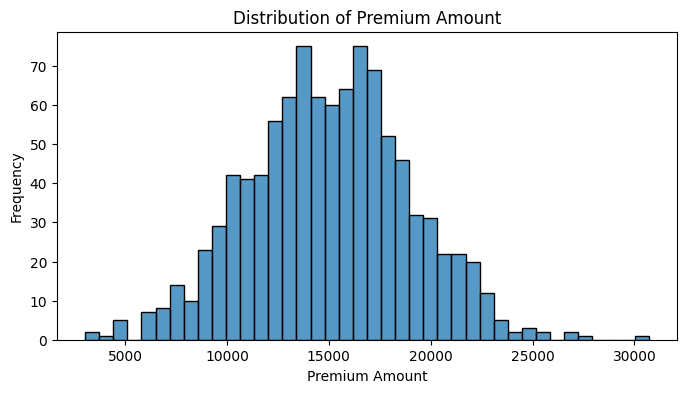

In [41]:
plt.figure(figsize=(8, 4))
sns.histplot(data['PremiumAmount'], bins=40)
plt.title('Distribution of Premium Amount')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.show()

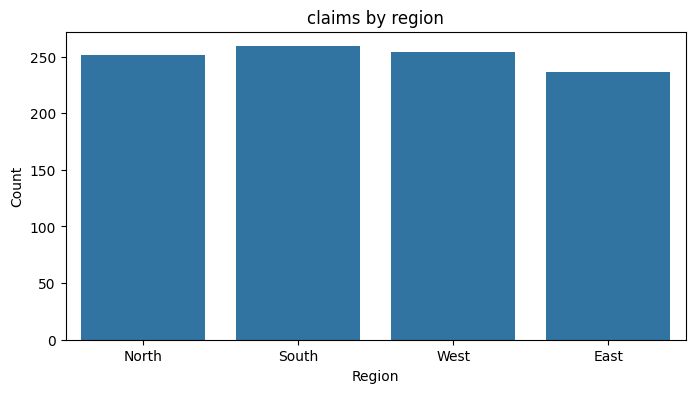

In [42]:
plt.figure(figsize=(8, 4 ))
sns.countplot(x='Region', data=data)
plt.title('claims by region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

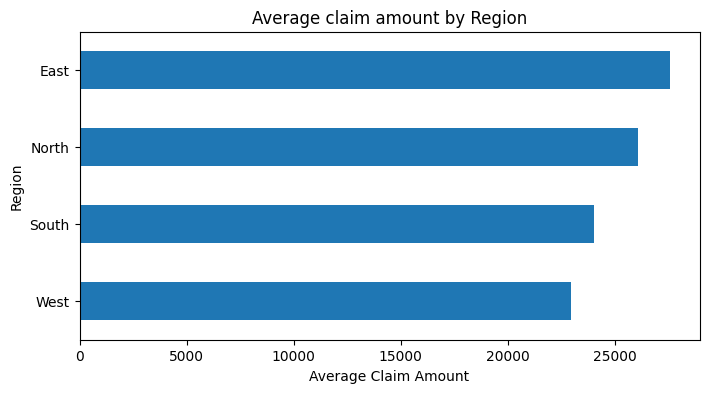

In [43]:
#Average Claim Amount by Region
plt.figure(figsize=(8,4))
region_claims=data[data['Claimed']==1].groupby('Region')['ClaimAmount'].mean().sort_values()
region_claims.plot(kind='barh')
plt.title("Average claim amount by Region")
plt.xlabel("Average Claim Amount")
plt.show()

In [44]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [45]:
data['InsuranceType'].unique()

array(['Property', 'Life', 'Vehicle', 'Health'], dtype=object)

In [46]:
data['Region'].unique()

array(['North', 'South', 'West', 'East'], dtype=object)

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [48]:
data['Gender']=le.fit_transform(data['Gender'])

In [49]:
data['Gender'].unique()

array([1, 0])

In [50]:
data['InsuranceType']=le.fit_transform(data['InsuranceType'])

In [51]:
data['InsuranceType'].unique()

array([2, 1, 3, 0])

In [52]:
data['Region']=le.fit_transform(data['Region'])

In [53]:
data['Region'].unique()

array([1, 2, 3, 0])

In [54]:
df=data.drop(['CustomerID'], axis=1)

In [55]:
df.head()

,Age,Gender,Region,InsuranceType,PolicyTenure,PremiumAmount,Claimed,ClaimAmount
0,56,1,1,2,5,14085.60,0,0.0
1,69,1,2,1,3,11022.60,0,0.0
2,46,1,3,2,29,4750.67,0,0.0
3,32,0,1,3,28,14235.89,0,0.0
4,60,1,3,0,29,24650.46,0,0.0


In [57]:
x=df[['Age', 'Gender', 'Region', 'InsuranceType', 'PolicyTenure', 'PremiumAmount', 'Claimed']]
y=df['ClaimAmount']